In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math
import time
import random

from PIL import Image, ImageDraw

## Mandelbrot

s is a sample (pixel/point of plot). i is number of iterations before stating that does not go to infinity, and therefore does not lie within the mandelbrot set. 

Investigates what happens when s and i increase separetly. 

In [2]:
c = complex(2,2)
Z0 = c
Z = Z0

def amount_iter(compl, max_steps, threshold_inf: int = 2):
    c = compl
    z = 0
    i = 0
    while abs(z) < threshold_inf and i < max_steps:
        z = z**2 + c
        i += 1
    return i

#z*z.conjugate()).real

## Plotting the MandelBrot set

In [ ]:
## Creating a picture of the Mandelbrot set

max_steps = 1000 # this is equal to i

# Image size (pixels), this is equal to the amount of samples s
X_WIDTH = 900
Y_HEIGHT = 600

# Plot window
real_minus = -2
real_max = 1
real_dif = real_max - real_minus
imag_minus = -1
imag_max = 1
imag_dif = imag_max - imag_minus

im = Image.new('HSV', (X_WIDTH, Y_HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)
percentage = 0


for pix_x in range(0, X_WIDTH):
    for pix_y in range(0, Y_HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(real_minus + (pix_x / X_WIDTH) * real_dif,
                    imag_minus + (pix_y / Y_HEIGHT) * imag_dif)
        # Compute the number of iterations
        m = amount_iter(c, max_steps)
        # The color depends on the number of iterations
        hue = int(255 * m / max_steps)
        saturation = 255
        if m < max_steps:
            value = 255 
        else:
            value = 0
        # Plot the point
        draw.point([pix_x, pix_y], (hue, saturation, value))
#     if percentage != str(round(pix_x/X_WIDTH,2)):
#         percentage = str(round(pix_x/X_WIDTH,2))
#         print("Percentage: " + percentage + "%")
        
im.convert('RGB').save('output.png', 'PNG')

imgplot = plt.imshow(im.convert('RGB'))

## Monte Carlo

In [3]:
def xy_rand():                   # Creating random samples
    x = 3*np.random.random_sample()-2       # X domain is [-2,1]
    y = 2*np.random.random_sample()-1       # Y domain is [-1,1]
    return x,y 

In [195]:
## Change the amount of i (iterations) before stating that the point does not go to infinity
## For two different sample size 
start = time.time()
t = 0
samples = [529, 1024]
simulations = 10
listA = [[[],[]]]
for i in range(simulations-1):
    listA.append([[],[]])
max_steps = 1000 # this is equal to i
maxmax_steps = 1000

for simulation in range(simulations):               # The amount of simulations
    print("Simulation: " + str(simulation))
    for value in range(len(samples)):               # for different sample size
        for max_steps in range(1,maxmax_steps,2):       # maximum amount of step sizes for each sample
            t = 0
            f = 0
    #         print(listA)
            for s in range(samples[value]):         # take samples 
                x, y = xy_rand()
                m = amount_iter(complex(x,y), max_steps)
    #             print(m)
                if m == max_steps:
                    t += 1
            listA[simulation][value].append(t/samples[value]*6)
    
end = time.time()
print("Running time: " + str(end - start))

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Running time: 494.30092906951904


In [250]:
## Create new list where the sample with the most i is subtracted from all the values
## Next create a new list, where you reorder everything, now having all samples from each for each i, s in the same list

listAdif = [[[],[]]]
for i in range(simulations-1):
    listAdif.append([[],[]])

for simulation in range(simulations):
    for value in range(len(samples)):
        for x in range(len(listA[simulation][value])):
            listAdif[simulation][value].append(listA[simulation][value][x])
        for i in range(len(listAdif[simulation][value])):
            listAdif[simulation][value][i] -= listAdif[simulation][value][len(listAdif[simulation][value])-1]
#             listAdif[simulation][value][i] = abs(listAdif[simulation][value][i] - listAdif[simulation][value][len(listAdif[simulation][value])-1])

preAnewlistA = [[]]
for i in range(499):
    preAnewlistA.append([])
preBnewlistA = [[]]
for i in range(499):
    preBnewlistA.append([])
newlistA = []
newlistA.append(preAnewlistA)
newlistA.append(preBnewlistA)

for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        for simulation in range(simulations):
            newlistA[sample_size][i]
            newlistA[sample_size][i].append(listAdif[simulation][sample_size][i])                          


In [240]:
## Calculating the mean, standard deviation, and confidence interval
means = [[],[]]
sd = [[],[]]
lower_bound = [[],[]]
upper_bound = [[],[]]
for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        means[sample_size].append(statistics.mean(newlistA[sample_size][i]))
        sd[sample_size].append(statistics.stdev(newlistA[sample_size][i]))
        lower_bound[sample_size].append(means[sample_size][i] - 1.96*sd[sample_size][i]/math.sqrt(simulations))
        upper_bound[sample_size].append(means[sample_size][i] + 1.96*sd[sample_size][i]/math.sqrt(simulations))

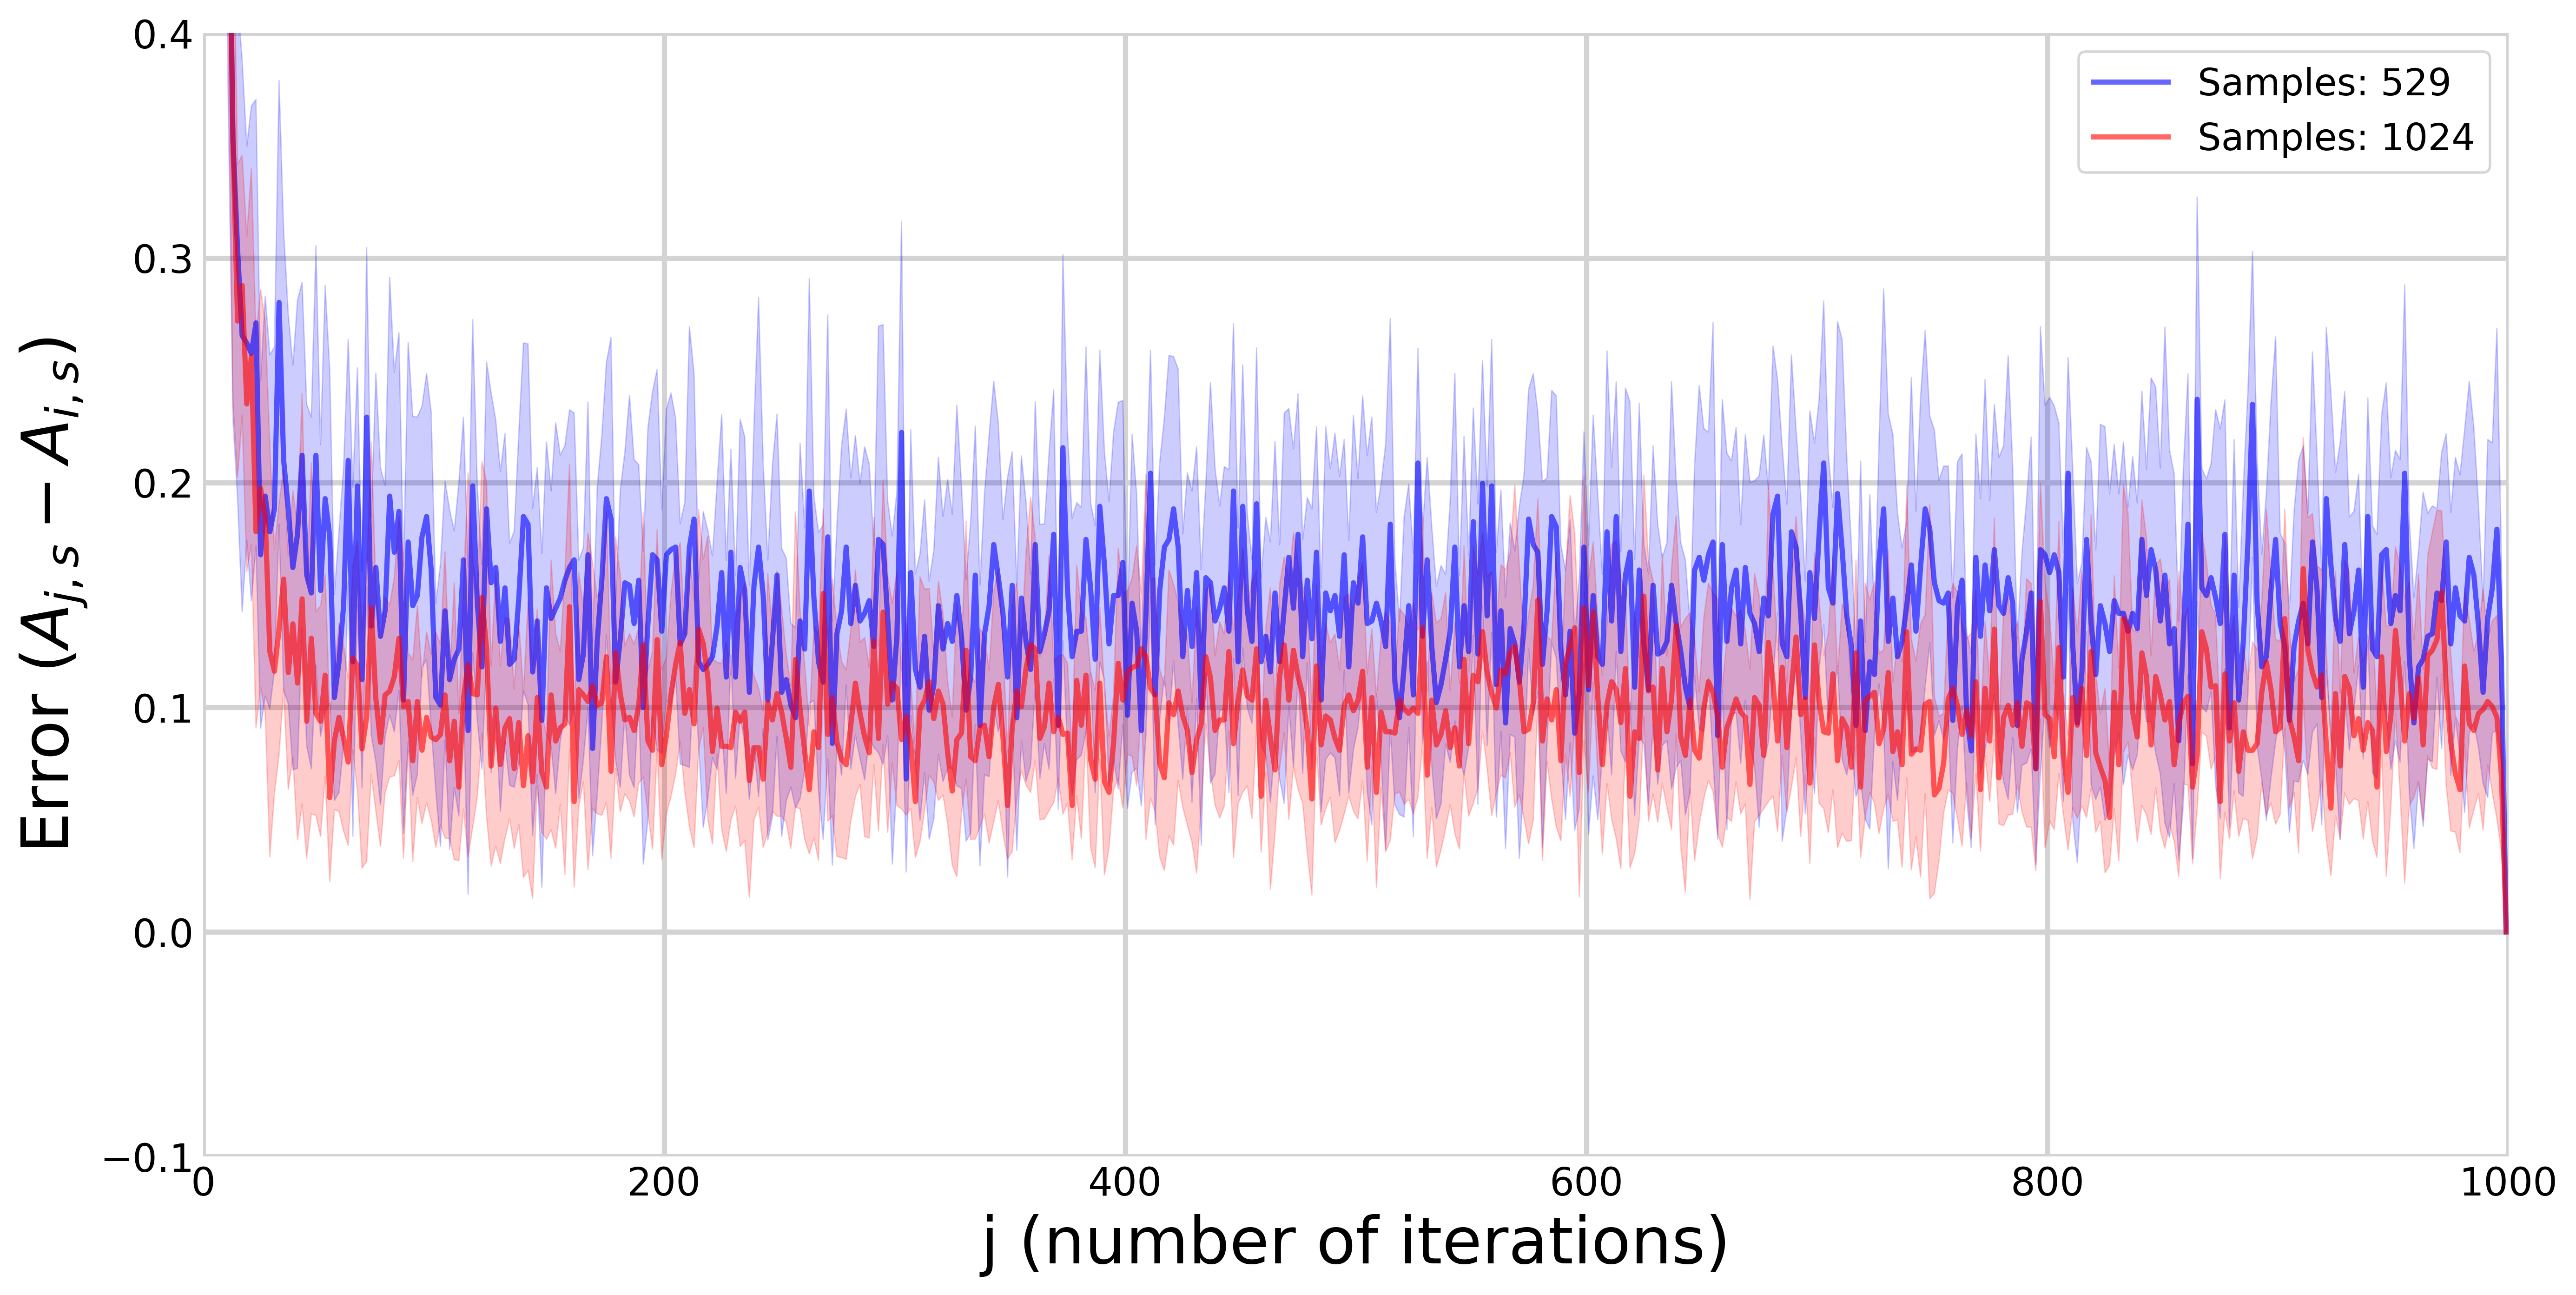

In [247]:
## Creating a plot of the error of the area estimations as function of j

colors = ['b', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8), dpi = 400)
ax = fig.add_subplot(111, axisbelow=True)

for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps,2), means[value], color = colors[value], alpha=0.6, 
            lw=2, label= "Samples: " + str(samples[value]))
    ax.fill_between(x = range(1,maxmax_steps,2), y1 = lower_bound[value],
                y2 = upper_bound[value], linewidth = 0.5, color=colors[value], alpha=0.2)
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Error ($A_{j,s} - A_{i,s})$', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
# ax.set_yscale('log')
ax.set_ylim(-0.1,0.4)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.legend(fontsize="x-large")
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

## Latin Hypercube sampling

In [127]:
## Defining a method to for latin hypercube sampling

def xy_LHS(samples, dimensions = 2, strength = 1):
    xrange = [-2,1]
    yrange = [-1,1]
    samples = samples
    dimensions = dimensions
    strength = strength
    MAJOR = int(samples**(1/strength))
    xlist = np.zeros([int(MAJOR)])
    ylist = np.zeros([int(MAJOR)])
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
    m = xrange[0] + (0.5/samples)*xdif
    n = yrange[0] + (0.5/samples)*ydif
    for j in range(MAJOR):
        xlist[j] = m + np.random.random_sample()*xdif*(1/(2*MAJOR))
        ylist[j] = n + np.random.random_sample()*ydif*(1/(2*MAJOR))
        n += (1/samples)*ydif
        m += (1/samples)*xdif
    for k in range(samples):
        xlist = np.random.permutation(xlist)
        ylist = np.random.permutation(ylist)
    return xlist,ylist

In [201]:
## Change the amount of i (iterations) before stating that the point does not go to infinity
## For two different sample size 
## Approximation by LHS

start = time.time()
simulations = 10
listLHS = [[[],[]]]
for i in range(simulations-1):
    listLHS.append([[],[]])

samples = [529, 1024]
max_steps = 1000 # this is equal to i
maxmax_steps = 1000

for simulation in range(simulations):
    print("Simulation: " + str(simulation))
    for value in range(len(samples)):
#         print("Amount of samples: " + str(samples[value]))
        for max_steps in range(1,maxmax_steps,2):
            t = 0
            x_LHS,y_LHS = xy_LHS(samples[value])
#             if max_steps%100 == 0:
#                 print("Percentage: "+ str(max_steps/maxmax_steps * 100) + "%")
            for index in range(len(x_LHS)):
    #             print(index)
                x, y = x_LHS[index], y_LHS[index]
                m = amount_iter(complex(x,y), max_steps)
                if m == max_steps:
                    t += 1
        #     print(t/it*6)
            listLHS[simulation][value].append(t/samples[value]*6)

end = time.time()
print("Running time: " + str(end - start))

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Running time: 863.1384620666504


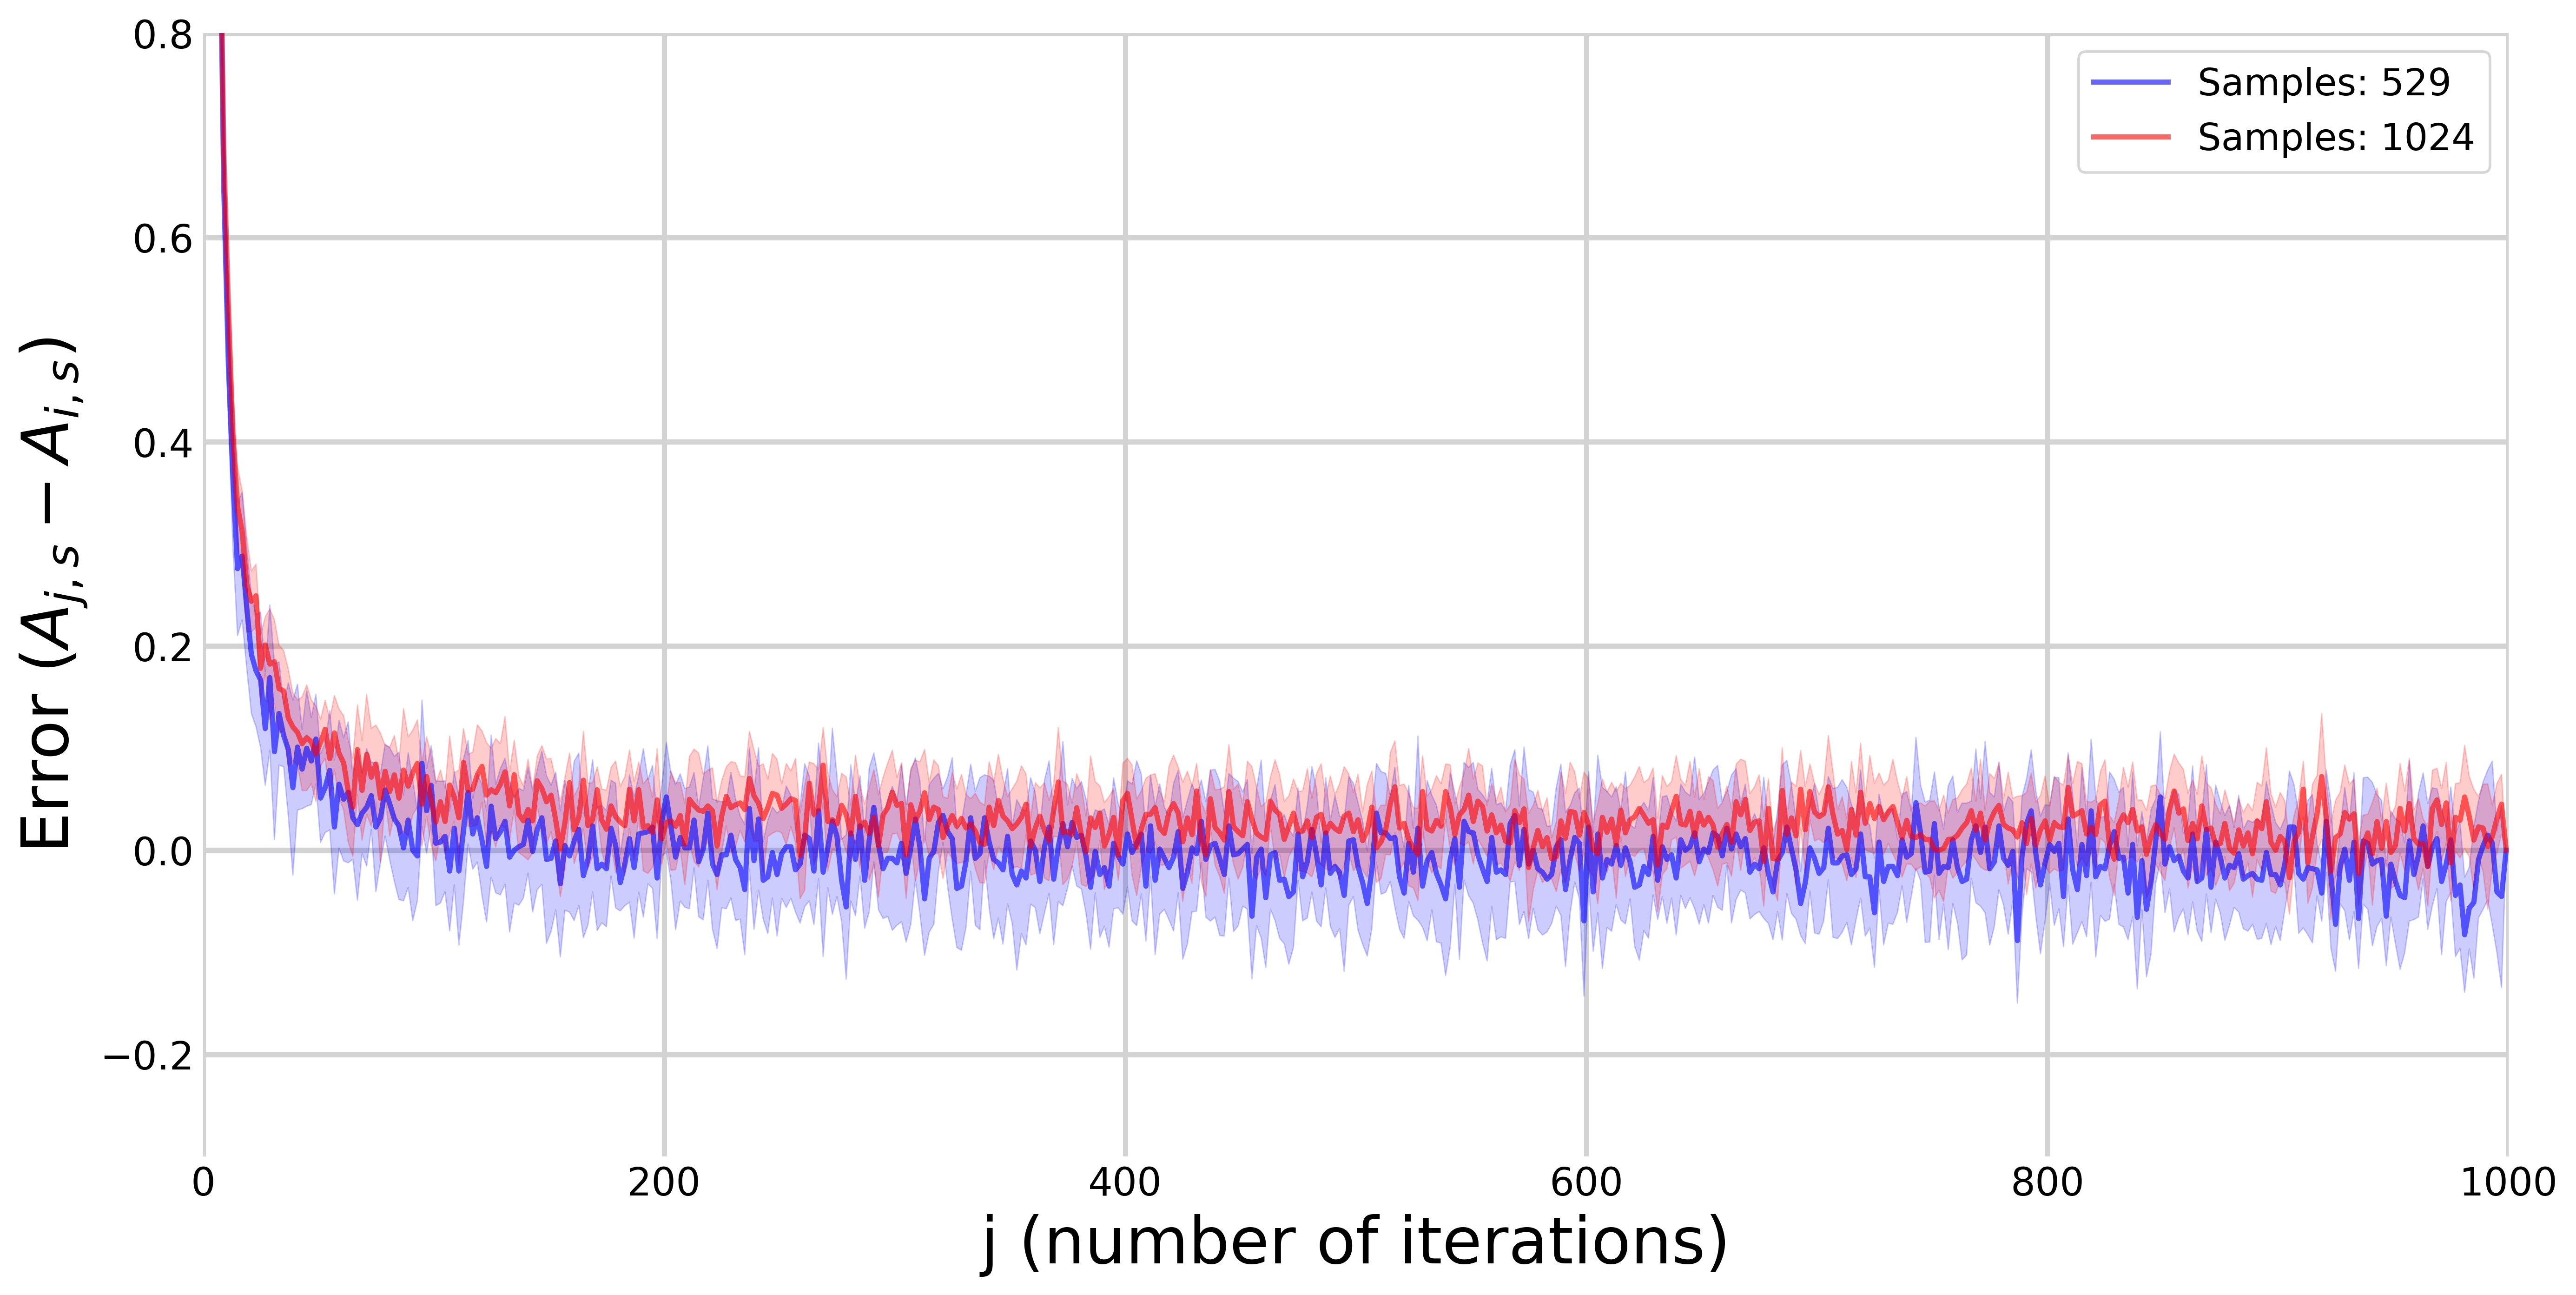

In [249]:
## Create a list with the differences, next rearrange the list, so it is possible to perform statistic tests

listLHSdif = [[[],[]]]
for i in range(simulations-1):
    listLHSdif.append([[],[]])
    
for simulation in range(simulations):
    for value in range(len(samples)):
        for x in range(len(listLHS[simulation][value])):
            listLHSdif[simulation][value].append(listLHS[simulation][value][x])
        for i in range(len(listLHSdif[simulation][value])):
            listLHSdif[simulation][value][i] -= listLHSdif[simulation][value][len(listLHSdif[simulation][value])-1]
#             listLHSdif[simulation][value][i] = abs(listLHSdif[simulation][value][i] - listLHSdif[simulation][value][len(listLHSdif[simulation][value])-1])
            
            

preAnewlistLHS = [[]]
for i in range(499):
    preAnewlistLHS.append([])
preBnewlistLHS = [[]]
for i in range(499):
    preBnewlistLHS.append([])
newlistLHS = []
newlistLHS.append(preAnewlistLHS)
newlistLHS.append(preBnewlistLHS)

for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        for simulation in range(simulations):
            newlistLHS[sample_size][i]
            newlistLHS[sample_size][i].append(listLHSdif[simulation][sample_size][i])                   

            
## Calculating the mean, standard deviation, and confidence interval
meansLHS = [[],[]]
sdLHS = [[],[]]
lower_boundLHS = [[],[]]
upper_boundLHS = [[],[]]
for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        meansLHS[sample_size].append(statistics.mean(newlistLHS[sample_size][i]))
        sdLHS[sample_size].append(statistics.stdev(newlistLHS[sample_size][i]))
        lower_boundLHS[sample_size].append(meansLHS[sample_size][i] - 1.96*sdLHS[sample_size][i]/math.sqrt(simulations))
        upper_boundLHS[sample_size].append(meansLHS[sample_size][i] + 1.96*sdLHS[sample_size][i]/math.sqrt(simulations))


colors = ['b', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8), dpi = 400)
ax = fig.add_subplot(111, axisbelow=True)
for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps,2), meansLHS[value], color = colors[value], alpha=0.6, 
            lw=2, label= "Samples: " + str(samples[value]))
    ax.fill_between(x = range(1,maxmax_steps,2), y1 = lower_boundLHS[value],
                y2 = upper_boundLHS[value], linewidth = 0.5, color=colors[value], alpha=0.2)
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Error ($A_{j,s} - A_{i,s})$', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="x-large")
ax.set_ylim(-0.3,0.8)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

## Orthogonal

16


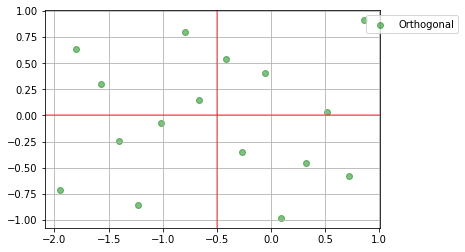

In [175]:
## Defining a method to sample orthognally 

def another_Orthogonal(ns):
    xrange = [-2,1]
    yrange = [-1,1]
    xdif = xrange[1] - xrange[0]
    ydif = yrange[1] - yrange[0]
    assert(np.sqrt(ns) % 1 == 0),"Please insert an even number of samples"
    n = int(np.sqrt(ns))
    # Making a datastructure of a dict with coordinate tuples of a bigger grid with subcoordinate of sub-grid points
    blocks = {(i,j):[(a,b) for a in range(n) for b in range(n)] for i in range(n) for j in range(n)}
    points = []#np.empty((n,2))
    append = points.append # tips of python to fasten up append call
    for block in blocks:
        point = random.choice(blocks[block])
        lst_row = [(k1, b) for (k1, b), v in blocks.items() if k1 == block[0]]
        lst_col = [(a, k1) for (a, k1), v in blocks.items() if k1 == block[1]]

        for col in lst_col:
            blocks[col] = [a for a in blocks[col] if a[1] != point[1]]

        for row in lst_row:
            blocks[row] = [a for a in blocks[row] if a[0] != point[0]]
        #Adjust the points to fit the grid they fall in  
        point = (point[0] + n * block[0], point[1] + n * block[1])
        append(point)
    x = []
    y = []
    for i in range(len(points)):
#         x = (3*points[i][0]/ns-2 + np.random.random_sample()*xdif/(2*ns)).append
#         y = (3*points[i][1]/ns-2 + np.random.random_sample()*ydif/(2*ns)).append
        x.append(3*points[i][0]/ns-2 + np.random.random_sample()*xdif/(2*ns))
        y.append(2*points[i][1]/ns-1 + np.random.random_sample()*ydif/(2*ns))
    return x,y

x_LHS,y_LHS = xy_LHS(20)
x_orth, y_orth = another_Orthogonal(16)
print(len(x_orth))
xlist = []
ylist = []
for i in range(20):
    x, y = xy_rand()
#     x = (x+ 2)/3
#     y = (y + 1)/2
    xlist.append(x)
    ylist.append(y)
    
# plt.scatter(x_LHS, y_LHS, color="b", label="LHS-MDU", alpha = 0.5)
plt.scatter(x_orth, y_orth, color="g", label="Orthogonal", alpha = 0.5)
# plt.scatter(xlist, ylist, color="r", label="MC", alpha = 0.5)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.5)
plt.axvline(x=-0.5, color='r', linestyle='-', alpha = 0.5)

plt.legend(bbox_to_anchor=(1.25, 1))
plt.grid()
plt.show()

In [176]:
## Change the amount of i (iterations) before stating that the point does not go to infinity
## For two different sample size 
## Approximation by orthogonal sampling

start = time.time()

samples = [529, 1024]
simulations = 10
listorth = [[[],[]]]
for i in range(simulations-1):
    listorth.append([[],[]])
max_steps = 1000 # this is equal to i
maxmax_steps = 1000
startint = time.time()

for simulation in range(simulations):
    print("Simulation: " + str(simulation+1) + " out of " + str(simulations))
    for value in range(len(samples)):
        print("Amount of samples: " + str(samples[value]))
        for max_steps in range(1,maxmax_steps,2):
            t = 0
            x_orth,y_orth = another_Orthogonal(samples[value])
            for index in range(len(x_orth)):
    #             print(index)
                x, y = x_orth[index], y_orth[index]
                m = amount_iter(complex(x,y), max_steps)
                if m == max_steps:
                    t += 1
        #     print(t/it*6)
            listorth[simulation][value].append(t/samples[value]*6)
            if max_steps%100 == 1:
                endint = time.time()
                print("Percentage: "+ str(max_steps/maxmax_steps * 100) + "%. Running time interval: " + str(endint - startint))
                startint = time.time()

end = time.time()
print("Running time: " + str(end - start))

Simulation: 1 out of 10
Amount of samples: 529
Percentage: 0.1%. Running time interval: 0.7170107364654541
Percentage: 10.100000000000001%. Running time interval: 39.154844760894775
Percentage: 20.1%. Running time interval: 50.06901526451111
Percentage: 30.099999999999998%. Running time interval: 48.55370783805847
Percentage: 40.1%. Running time interval: 45.0024631023407
Percentage: 50.1%. Running time interval: 45.22838997840881
Percentage: 60.099999999999994%. Running time interval: 51.30966091156006
Percentage: 70.1%. Running time interval: 46.26160001754761
Percentage: 80.10000000000001%. Running time interval: 48.030330181121826
Percentage: 90.10000000000001%. Running time interval: 47.19845271110535
Amount of samples: 1024
Percentage: 0.1%. Running time interval: 50.96876811981201
Percentage: 10.100000000000001%. Running time interval: 163.89049911499023
Percentage: 20.1%. Running time interval: 171.5499837398529
Percentage: 30.099999999999998%. Running time interval: 187.878261

Percentage: 70.1%. Running time interval: 206.45510697364807
Percentage: 80.10000000000001%. Running time interval: 213.10053086280823
Percentage: 90.10000000000001%. Running time interval: 215.90151262283325
Simulation: 7 out of 10
Amount of samples: 529
Percentage: 0.1%. Running time interval: 206.70966839790344
Percentage: 10.100000000000001%. Running time interval: 45.454935789108276
Percentage: 20.1%. Running time interval: 44.85069990158081
Percentage: 30.099999999999998%. Running time interval: 44.38853693008423
Percentage: 40.1%. Running time interval: 46.491647720336914
Percentage: 50.1%. Running time interval: 44.761146545410156
Percentage: 60.099999999999994%. Running time interval: 44.94498252868652
Percentage: 70.1%. Running time interval: 45.91397833824158
Percentage: 80.10000000000001%. Running time interval: 44.19863200187683
Percentage: 90.10000000000001%. Running time interval: 49.237051486968994
Amount of samples: 1024
Percentage: 0.1%. Running time interval: 55.6794

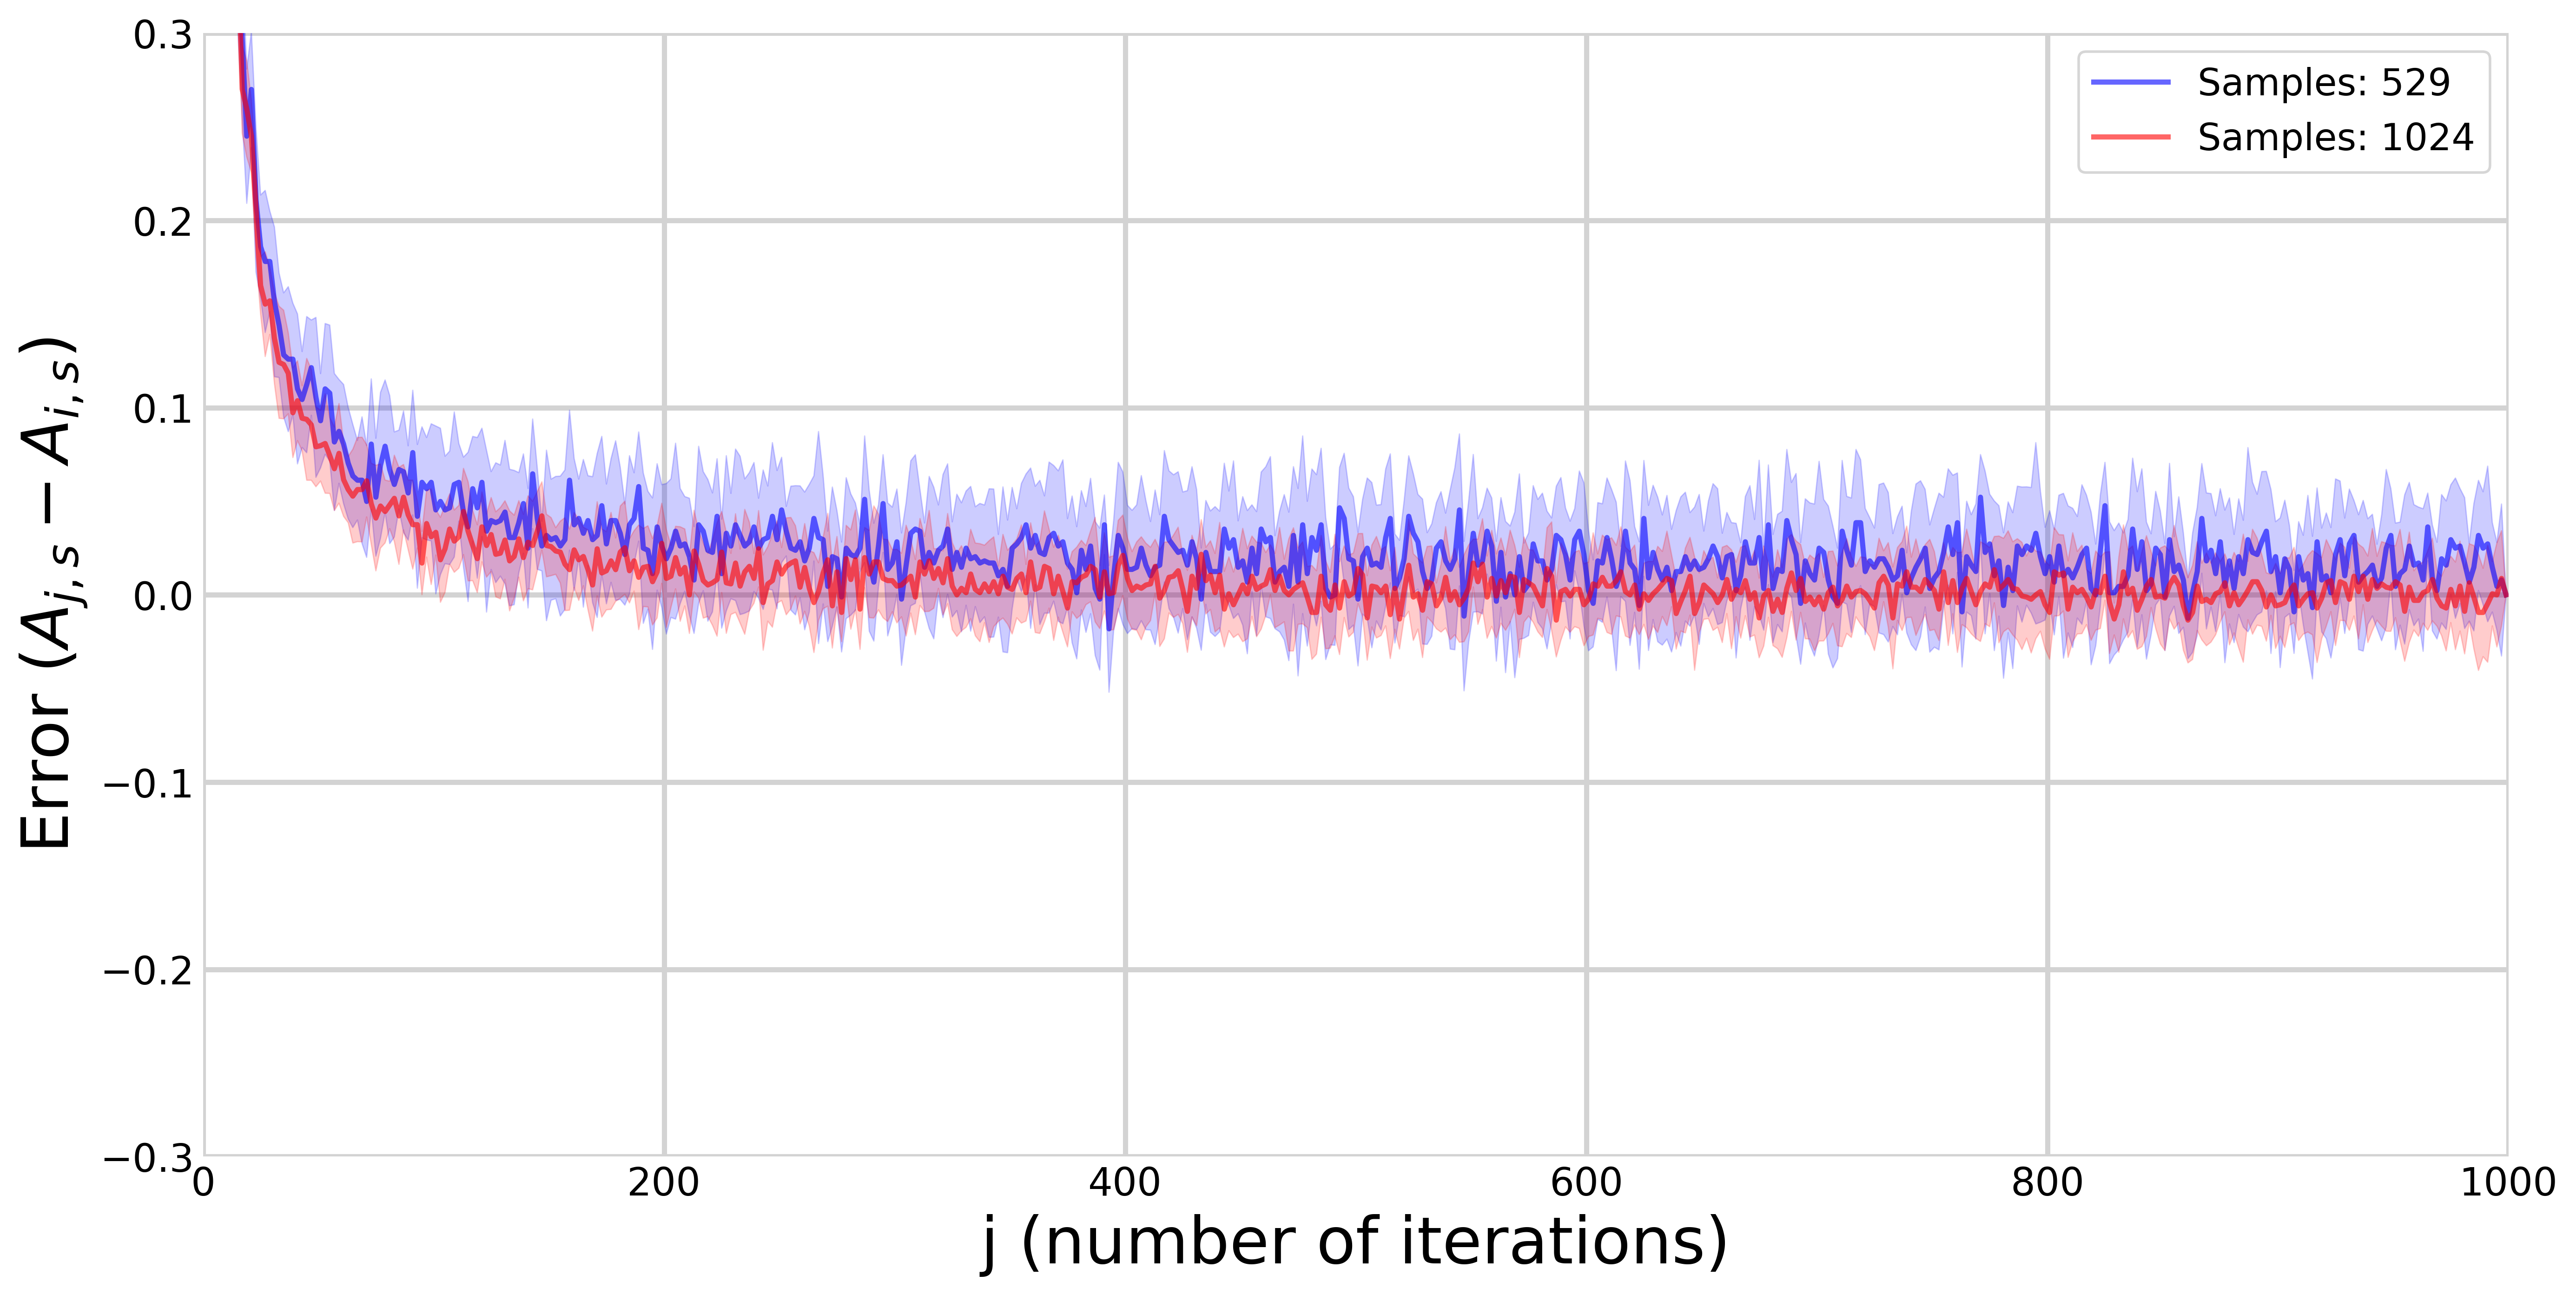

In [248]:
## Create a list with the differences, next rearrange the list, so it is possible to perform statistic tests
listorthdif = [[[],[]]]
for i in range(simulations-1):
    listorthdif.append([[],[]])
    
for simulation in range(simulations):
    for value in range(len(samples)):
        for x in range(len(listorth[simulation][value])):
            listorthdif[simulation][value].append(listorth[simulation][value][x])
        for i in range(len(listorthdif[simulation][value])):
            listorthdif[simulation][value][i] -= listorthdif[simulation][value][len(listorthdif[simulation][value])-1]
#             listorthdif[simulation][value][i] = abs(listorthdif[simulation][value][i] - listorthdif[simulation][value][len(listorthdif[simulation][value])-1])
                      

preAnewlistorth = [[]]
for i in range(499):
    preAnewlistorth.append([])
preBnewlistorth = [[]]
for i in range(499):
    preBnewlistorth.append([])
newlistorth = []
newlistorth.append(preAnewlistorth)
newlistorth.append(preBnewlistorth)

for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        for simulation in range(simulations):
            newlistorth[sample_size][i]
            newlistorth[sample_size][i].append(listorthdif[simulation][sample_size][i])                   

## Calculating the mean, standard deviation, and confidence interval
meansorth = [[],[]]
sdorth = [[],[]]
lower_boundorth = [[],[]]
upper_boundorth = [[],[]]
for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        meansorth[sample_size].append(statistics.mean(newlistorth[sample_size][i]))
        sdorth[sample_size].append(statistics.stdev(newlistorth[sample_size][i]))
        lower_boundorth[sample_size].append(meansorth[sample_size][i] - 1.96*sdorth[sample_size][i]/math.sqrt(simulations))
        upper_boundorth[sample_size].append(meansorth[sample_size][i] + 1.96*sdorth[sample_size][i]/math.sqrt(simulations))
        
colors = ['b', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8), dpi = 400)
ax = fig.add_subplot(111, axisbelow=True)
for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps,2), meansorth[value], color = colors[value], alpha=0.6, 
            lw=2, label= "Samples: " + str(samples[value]))
    ax.fill_between(x = range(1,maxmax_steps,2), y1 = lower_boundorth[value],
                y2 = upper_boundorth[value], linewidth = 0.5, color=colors[value], alpha=0.2)
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Error ($A_{j,s} - A_{i,s})$', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="x-large")
ax.set_ylim(-0.3,0.3)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

## Control variet & orthogonal

In [210]:
## Using a control variet on the orthogonal sampling area estimation

tvaluesorth=[]
preAtvaluesorth = [[]]
for i in range(499):
    preAtvaluesorth.append([])
preBtvaluesorth = [[]]
for i in range(499):
    preBtvaluesorth.append([])
tvaluesorth.append(preAtvaluesorth)
tvaluesorth.append(preBtvaluesorth)

for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        for simulation in range(simulations):
#             newlistorth[sample_size][i]
#             newlistorth[sample_size][i].append(listorthdif[simulation][sample_size][i])                   
            tvaluesorth[sample_size][i]
            tvaluesorth[sample_size][i].append(1/(1+listorth[simulation][sample_size][i]/6))

modifiedorth = []
premodifiedorth = [[]]
for i in range(499):
    premodifiedorth.append([])
preBmodifiedorth = [[]]
for i in range(499):
    preBmodifiedorth.append([])
modifiedorth.append(premodifiedorth)
modifiedorth.append(preBmodifiedorth)


## Calculating the new area estimation 
            
covsorth = [[],[]]
corth = [[0],[0]]
meansTorth = [[],[]]
meansmodorth = [[],[]]
meansorth = [[],[]]
sdTorth = [[],[]]
sdorth = [[],[]]
sdAorth = [[],[]]
lower_boundorth = [[],[]]
upper_boundorth = [[],[]]
lower_boundmodorth = [[],[]]
upper_boundmodorth = [[],[]]

# print(len(int(maxmax_steps/2)))
for sample_size in range(len(samples)):
    for i in range(int(maxmax_steps/2)):
        meansorth[sample_size].append(statistics.mean(newlistorth[sample_size][i]))
        sdorth[sample_size].append(statistics.stdev(newlistorth[sample_size][i]))
        meansTorth[sample_size].append(statistics.mean(tvaluesorth[sample_size][i]))
        sdTorth[sample_size].append(statistics.stdev(tvaluesorth[sample_size][i]))
        lower_boundorth[sample_size].append(meansorth[sample_size][i] - 1.96*sdorth[sample_size][i]/math.sqrt(simulations))
        upper_boundorth[sample_size].append(meansorth[sample_size][i] + 1.96*sdorth[sample_size][i]/math.sqrt(simulations))
        tempcov = 0
        for v in range(len(tvaluesorth[sample_size][i])):
            tempcov += ((tvaluesorth[sample_size][i][v] - meansTorth[sample_size][i]) * (newlistorth[sample_size][i][v] - meansorth[sample_size][i]))
        covsorth[sample_size].append(tempcov/(len(tvaluesorth[sample_size][i])-1))        
        if i > 0:
            corth[sample_size].append(-(covsorth[sample_size][i])/(sdTorth[sample_size][i]**2))
        for sim in range(len(newlistorth[sample_size][i])):
            #print(s,i,sim)
            #if s == 1:
                #print(modifiedA[s][i],newlistA[s][i],tvalues[s][i])
            modifiedorth[sample_size][i].append(newlistorth[sample_size][i][sim]+ corth[sample_size][i]*(tvaluesorth[sample_size][i][sim]-meansTorth[sample_size][i]))
        meansmodorth[sample_size].append(statistics.mean(modifiedorth[sample_size][i]))
        sdAorth[sample_size].append(statistics.stdev(modifiedorth[sample_size][i]))
        lower_boundmodorth[sample_size].append(meansmodorth[sample_size][i] - 1.96*sdAorth[sample_size][i]/math.sqrt(simulations))
        upper_boundmodorth[sample_size].append(meansmodorth[sample_size][i] + 1.96*sdAorth[sample_size][i]/math.sqrt(simulations))

In [215]:
print(statistics.mean(lower_boundmodorth[0]))
print(statistics.mean(lower_boundorth[0]))
print(statistics.mean(upper_boundmodorth[0]))
print(statistics.mean(upper_boundorth[0]))
print(meansmodorth[1][-2])

0.03156069541826507
0.021294633761787068
0.07652096809780305
0.086787029754281
0.008789062500000135


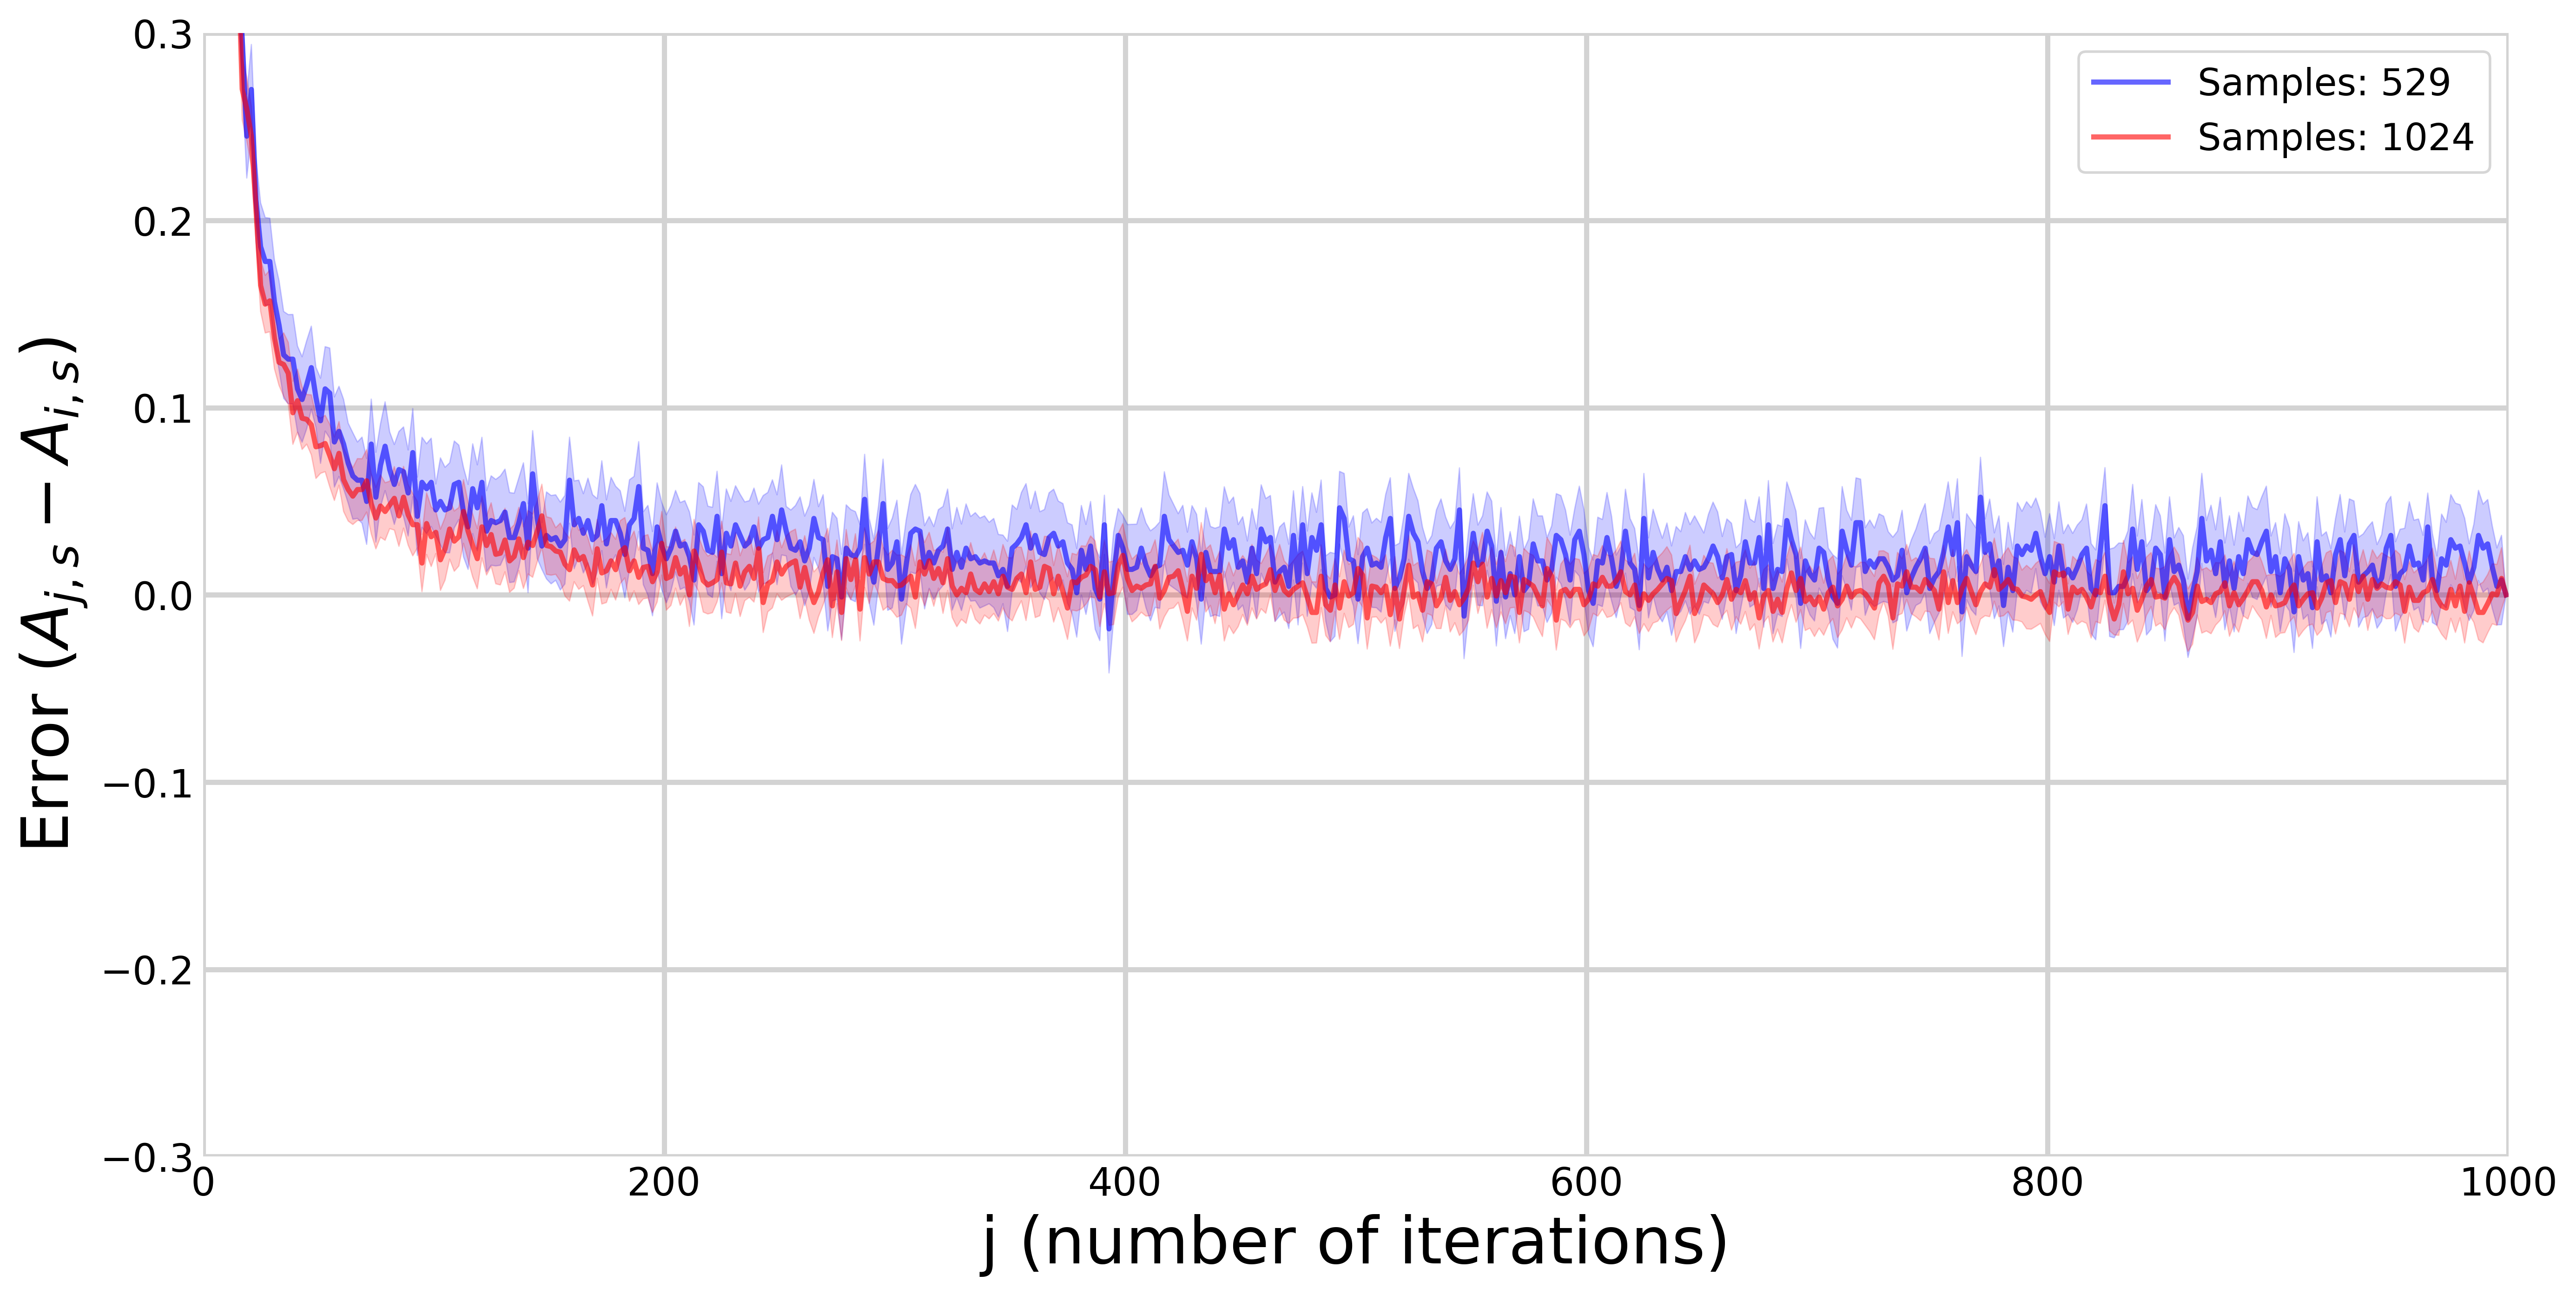

In [224]:
fig = plt.figure(figsize = (16, 8), dpi = 400)
ax = fig.add_subplot(111, axisbelow=True)
for value in range(len(samples)):
    ax.plot(range(1,maxmax_steps,2), meansmodorth[value], color = colors[value], alpha=0.6, 
            lw=2, label= "Samples: " + str(samples[value]))
    ax.fill_between(x = range(1,maxmax_steps,2), y1 = lower_boundmodorth[value],
                y2 = upper_boundmodorth[value], linewidth = 0.5, color=colors[value], alpha=0.2)
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Error ($A_{j,s} - A_{i,s})$', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="x-large")
ax.set_ylim(-0.3,0.3)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()

## Investigating the best sampling method for large s and i

In [ ]:
## Comparing the difference sampling techniques for a large s and i

start = time.time()
t = 0
samples = 1024 # this is equal to s
simulations = 1000
max_steps = 1000 # this is equal to i
maxmax_steps = 1000
randomsampling = []
LHS = []
Orthogonal = []
# randomsampling = []

for simulation in range(simulations):
#     print("Simulation: " + str(simulation))
    t = 0
    for i in range(samples):
        x, y = xy_rand()
        m = amount_iter(complex(x,y), max_steps)     
        if m == max_steps:
            t += 1
    randomsampling.append(t/samples*6)

print("Random sampling done")
for simulation in range(simulations):
#     print("Simulation: " + str(simulation))
    t = 0
    x_LHS,y_LHS = xy_LHS(samples)
    for index in range(len(x_LHS)):
        x, y = x_LHS[index], y_LHS[index]
        m = amount_iter(complex(x,y), max_steps)
        if m == max_steps:
            t += 1
    LHS.append(t/samples*6)
print("LH done")    
for simulation in range(simulations):
    if simulation%10 == 0:
        print("Simulation: " + str(simulation))
    t = 0
    x_orth,y_orth = another_Orthogonal(samples)
    for index in range(len(x_orth)):
        x, y = x_orth[index], y_orth[index]
        m = amount_iter(complex(x,y), max_steps)
        if m == max_steps:
            t += 1
    Orthogonal.append(t/samples*6)
    
end = time.time()
print("Running time: " + str(end - start))

In [ ]:
## Applying control variates to orthogonal sampling results

Orthogonaltvalues = []
Orthogonalmean = statistics.mean(Orthogonal)
varoth = (statistics.stdev(Orthogonal) ** 2)
for value in range(len(Orthogonal)):
    Orthogonaltvalues.append(1 / (1 + Orthogonal[value] / 6))
#     Orthogonaltvalues.append(math.exp(Orthogonal[value] / 6))

Orthogonaltvar = (statistics.stdev(Orthogonaltvalues) ** 2)
# Orthogonaltmean = (statistics.mean(Orthogonaltvalues))
# Orthogonaltmean = 1.285414
Orthogonaltmean = (statistics.mean(randomsampling) +statistics.mean(LHS)+statistics.mean(Orthogonal))/3
print(Orthogonaltmean)
tempcov = 0
valueforvariance = 0
for value in range(len(Orthogonal)):
    tempcov+=(Orthogonal[value]-Orthogonalmean) * (Orthogonaltvalues[value] - Orthogonaltmean)
    valueforvariance += (Orthogonaltvalues[value] - Orthogonaltmean)**2

Orthogonaltvar =  valueforvariance/ (simulations - 1)

covOrthogonal = tempcov / (simulations - 1)
cOrthogonal = - covOrthogonal / Orthogonaltvar
Orthogonalmod = []
differencet = []
for value in range(len(Orthogonal)):
    Orthogonalmod.append(Orthogonal[value] + cOrthogonal * (Orthogonaltvalues[value] - Orthogonaltmean))
    differencet.append(Orthogonaltvalues[value] - Orthogonaltmean)


    
# print(statistics.mean(differencet))

print("Mean of random sampling: "+ str(statistics.mean(randomsampling)) +
      ", the stdev of random sampling: " + str(statistics.stdev(randomsampling)))
print("Mean of LHC: "+ str(statistics.mean(LHS)) +
      ", the stdev of LHC: " + str(statistics.stdev(LHS)))
print("Mean of orthogonal: "+ str(statistics.mean(Orthogonal)) +
      ", the stdev of orthogonal: " + str(statistics.stdev(Orthogonal)))
print("Mean of modified orthogonal: "+ str(statistics.mean(Orthogonalmod)) +
      ", the stdev of orthogonal: " + str(statistics.stdev(Orthogonalmod)))
# print(statistics.mean(randomsampling))



print("Range of random sampling: "+ str(statistics.mean(randomsampling)-1.96/math.sqrt(simulations)*statistics.stdev(randomsampling)) +
       " till: " + str(statistics.mean(randomsampling)+1.96/math.sqrt(simulations)*statistics.stdev(randomsampling)))
print("Range of LHC: " + str(statistics.mean(LHS)-1.96/math.sqrt(simulations)*statistics.stdev(LHS)) +
       " till: " + str(statistics.mean(LHS)+1.96/math.sqrt(simulations)*statistics.stdev(LHS)))
print("Range of orthogonal: " + str(statistics.mean(Orthogonal)-1.96/math.sqrt(simulations)*statistics.stdev(Orthogonal)) +
       " till: " + str(statistics.mean(Orthogonal)+1.96/math.sqrt(simulations)*statistics.stdev(Orthogonal)))
print("Range of modified orthogonal: " + str(statistics.mean(Orthogonalmod)-1.96/math.sqrt(simulations)*statistics.stdev(Orthogonalmod)) +
       " till: " + str(statistics.mean(Orthogonalmod)+1.96/math.sqrt(simulations)*statistics.stdev(Orthogonalmod)))

In [251]:
## Plotting the results as boxplots for different methods

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df_random = pd.DataFrame({'area': randomsampling, 'Method': ['Random' for i in range(len(randomsampling))]})
df_LHS = pd.DataFrame({'area': LHS, 'Method': ['LHS' for i in range(len(LHS))]})
df_orthogonal = pd.DataFrame({'area': Orthogonal, 'Method': ['Orthogonal' for i in range(len(Orthogonal))]})
df_orthogonalmod = pd.DataFrame({'area': Orthogonalmod, 'Method': ['Orthogonal & \ncontrol variates' for i in range(len(Orthogonalmod))]})
df_orthogonalmodcheat = pd.DataFrame({'area': Orthogonalmodcheat, 'Method': ['Orthogonal & \ncontrol variates \n(cheating)' for i in range(len(Orthogonalmodcheat))]})
df_total = df_random.append(df_LHS)
df_total = df_total.append(df_orthogonal)
df_total = df_total.append(df_orthogonalmod)
df_total = df_total.append(df_orthogonalmodcheat)


sns.reset_orig ()
# sns.set(rc={'figure.figsize':(16,8)})

# fig, ax = plt.subplots()
# fig.set_size_inches(16, 8)
# sns.catplot(x="Method", y="area", kind="box", data=df_total, ax = ax)
# # sns.violinplot(data=d, inner="points", ax=ax)    
# sns.despine()

p = sns.catplot(x="Method", y="area", kind="box", data=df_total, height=6, aspect=12/6)
# p = sns.catplot(x="Method", y="area", kind="box", data=df_total)

plt.xlabel("Method", size = 20)
plt.ylabel("Area", size = 20)
# plt.title("The area for different sampling methods", size=20, y= 1.05)
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
p.set_yticklabels(ylabels, size=15)
p.set_xticklabels(xlabels, size=15)

plt.savefig('boxplots_area.png', format='png', dpi=600, bbox_inches = "tight")


NameError: name 'randomsampling' is not defined

In [ ]:
## Performing a levene test 

from scipy.stats import levene
oddsratio, pvalue = levene(Orthogonal, Orthogonalmod, center = "mean")
# stat, p = levene(a, b, c)
print(pvalue)